In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from octans import XLightCurve
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [4]:
data = pd.read_csv("../data/CHSS_3072_S56_120__final.csv")
data

,TIME,NORM_DT_SAP_FLUX,NORM_DT_SAP_FLUX_ERR,NORM_PDCSAP_FLUX,NORM_DT_PDCSAP_FLUX_ERR
0,2825.262888,0.977838,0.011057,0.946703,0.013113
1,2825.264277,0.987827,0.011073,0.958433,0.013131
2,2825.265666,0.975719,0.011009,0.944504,0.013056
3,2825.267054,0.973344,0.011034,0.943218,0.013086
4,2825.268443,0.968110,0.010982,0.938011,0.013024
...,...,...,...,...,...
14524,2849.993610,1.028050,0.013049,1.042627,0.016316
14525,2849.994999,1.026054,0.013038,1.039833,0.016303
14526,2849.996388,1.034324,0.013042,1.049451,0.016307
14527,2849.997777,1.020353,0.013022,1.033029,0.016282


In [5]:
xlc = XLightCurve(
    data["TIME"],
    data["NORM_DT_SAP_FLUX"],
    data["NORM_DT_SAP_FLUX_ERR"]
)
xlc

time,flux,flux_err
,,
Time,float64,float64
2825.2628877049674,0.9778375236305774,0.0110570873220869
2825.26427663652,0.9878267600649756,0.0110728208677438
2825.265665567608,0.9757190130342532,0.0110092743998094
2825.2670544991606,0.9733439437230748,0.0110343471979053
2825.268443430249,0.9681102946094392,0.0109823504844888
2825.269832361804,0.9759390524100386,0.0109865485369315
2825.271221292891,0.9743597266705932,0.011017496992166
2825.272610224444,0.9840796828633982,0.0110014492224502


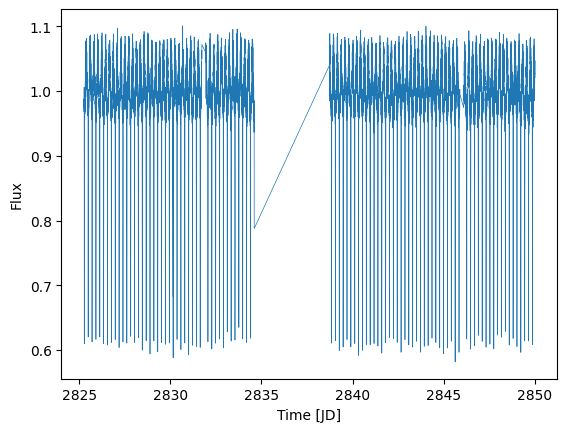

In [6]:
fig, ax = plt.subplots()

xlc.plot(ax=ax);
plt.show();

## Smooth

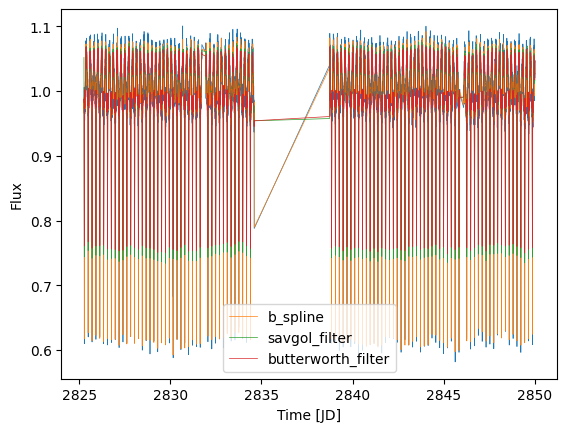

In [7]:
fig, ax = plt.subplots()

xlc.plot(ax=ax)
xlc.smooth_b_spline().plot(ax=ax, label="b_spline");
xlc.smooth_savgol_filter().plot(ax=ax, label="savgol_filter");
xlc.smooth_butterworth_filter().plot(ax=ax, label="butterworth_filter");

plt.legend()
plt.show()

### Zoomed

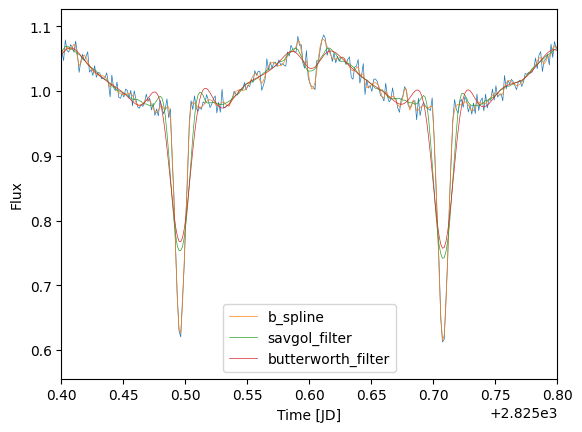

In [8]:
fig, ax = plt.subplots()

xlc.plot(ax=ax)
xlc.smooth_b_spline().plot(ax=ax, label="b_spline");
xlc.smooth_savgol_filter().plot(ax=ax, label="savgol_filter");
xlc.smooth_butterworth_filter().plot(ax=ax, label="butterworth_filter");

plt.legend()
plt.xlim([2825.4, 2825.8])
plt.show()

## Minima

Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: L

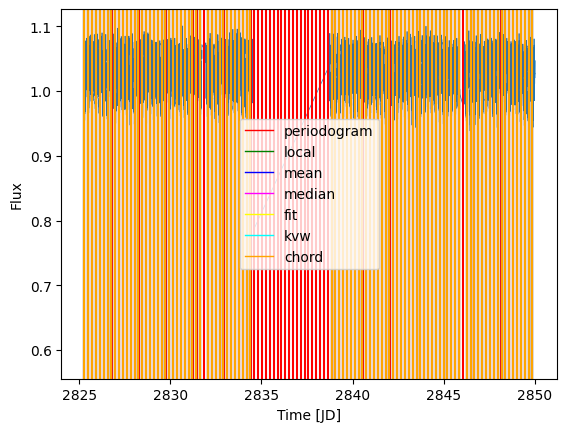

In [9]:
COLORS = ["red", "green", "blue", "magenta", "yellow", "cyan", "orange"]

minimas = xlc.minima("all")

fig, ax = plt.subplots()

xlc.plot(ax=ax)

legend_elements = []
for  i, (method, each_minimas) in enumerate(minimas.items()):

    legend_elements.append(Line2D([0], [0], color=COLORS[i], lw=1, label=method))
    
    for minima in each_minimas:
        ax.axvline(minima.jd, color=COLORS[i])


ax.legend(handles=legend_elements, loc='center')
plt.show()

### Zoomed

Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: Less than 3 points in in/egress can be paired. Decrease nfold parameter or provide more datapoints for in- or egress
Error: L

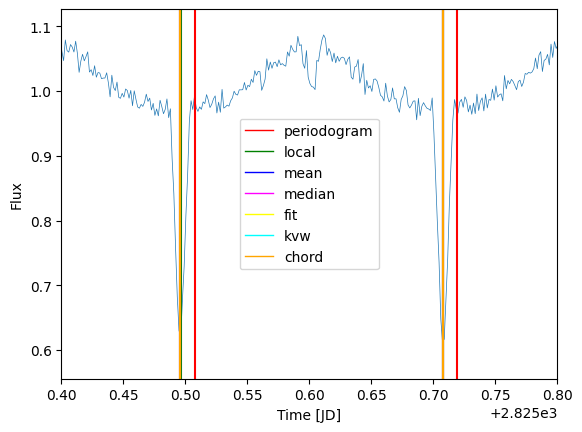

In [10]:
COLORS = ["red", "green", "blue", "magenta", "yellow", "cyan", "orange"]

minimas = xlc.minima("all")

fig, ax = plt.subplots()

xlc.plot(ax=ax)

legend_elements = []

for  i, (method, each_minimas) in enumerate(minimas.items()):

    legend_elements.append(Line2D([0], [0], color=COLORS[i], lw=1, label=method))
    
    for minima in each_minimas:
        ax.axvline(minima.jd, color=COLORS[i])


ax.legend(handles=legend_elements, loc='center')
plt.xlim([2825.4, 2825.8])
plt.show()

## Boundaries

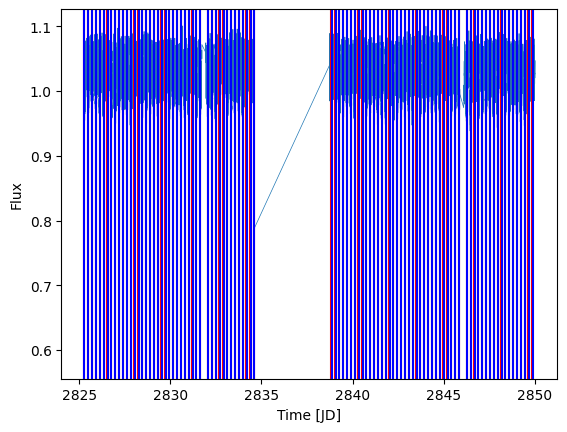

In [11]:
boundaries = xlc.boundaries_extrema()

fig, ax = plt.subplots()

xlc.plot(ax=ax)

for  boundary in boundaries:
    ax.axvline(boundary[0], color="red")
    ax.axvline(boundary[1], color="blue")

plt.show()

In [12]:
### Zoomed

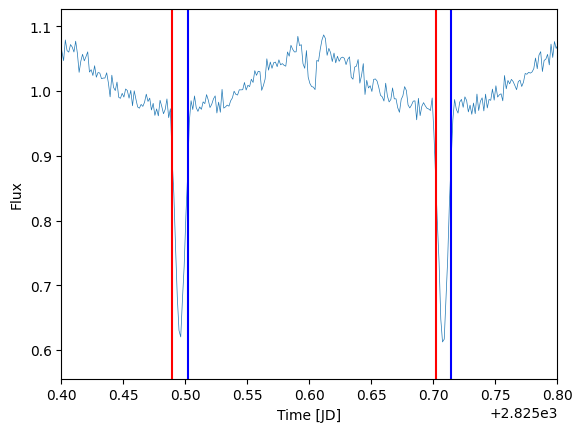

In [13]:
boundaries = xlc.boundaries_extrema()

fig, ax = plt.subplots()

xlc.plot(ax=ax)

for  boundary in boundaries:
    ax.axvline(boundary[0], color="red")
    ax.axvline(boundary[1], color="blue")

plt.xlim([2825.4, 2825.8])
plt.show()

## Fold

## fold_periodogram

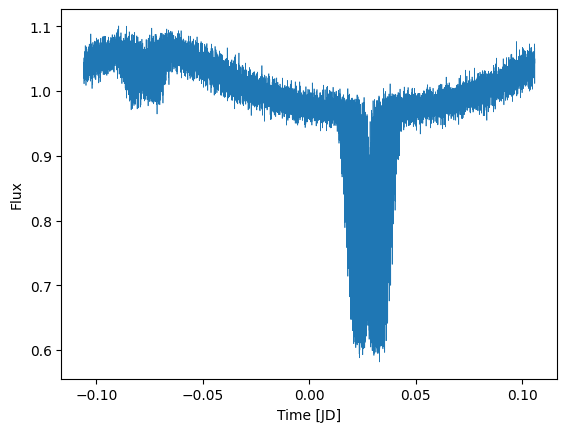

In [14]:
fig, ax = plt.subplots()

xlc.fold_periodogram().plot(ax=ax)
plt.show();

### fold_phase

In [15]:
t_0 = xlc.minima_local()[0]
t_0

<Time object: scale='tdb' format='jd' value=2825.2837216745447>

In [16]:
period = xlc.to_periodogram().period_at_max_power
period

<Quantity 0.2117832 d>

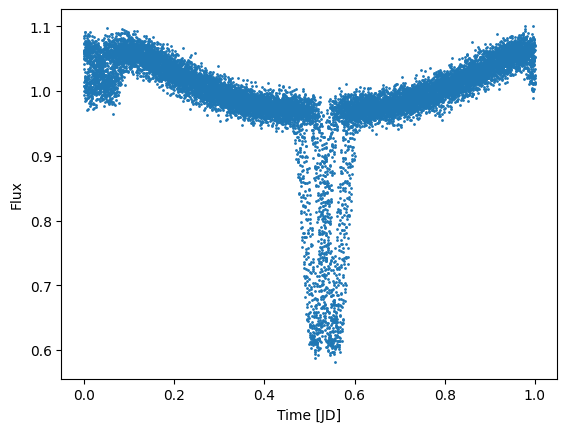

In [17]:
fig, ax = plt.subplots()

xlc.fold_phase(t_0, period).plot(ax=ax, marker=".", linestyle="none")
plt.show();